In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [93]:
# leer el archivo 1976-2020-president.csv
presidents = pd.read_csv('1976-2020-president.csv')
presidents


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


In [94]:
# leer el archivo 1976-2020-senate.csv
senate = pd.read_csv('1976-2020-senate.csv', encoding='latin-1')
senate

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party_detailed,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified
0,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,SAM STEIGER,REPUBLICAN,False,total,321236,741210,False,20210114,REPUBLICAN
1,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,WM. MATHEWS FEIGHAN,INDEPENDENT,False,total,1565,741210,False,20210114,OTHER
2,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,DENNIS DECONCINI,DEMOCRAT,False,total,400334,741210,False,20210114,DEMOCRAT
3,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,ALLAN NORWITZ,LIBERTARIAN,False,total,7310,741210,False,20210114,LIBERTARIAN
4,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,BOB FIELD,INDEPENDENT,False,total,10765,741210,False,20210114,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,2020,WYOMING,WY,56,83,68,US SENATE,statewide,gen,False,UNDER VOTES,NaN,False,total,6401,278503,False,20210114,OTHER
3625,2021,GEORGIA,GA,13,58,44,US SENATE,statewide,runoff,True,KELLY LOEFFLER,REPUBLICAN,False,total,2194848,4483294,True,20210114,REPUBLICAN
3626,2021,GEORGIA,GA,13,58,44,US SENATE,statewide,runoff,True,RAPHAEL WARNOCK,DEMOCRAT,False,total,2288446,4483294,True,20210114,DEMOCRAT
3627,2021,GEORGIA,GA,13,58,44,US SENATE,statewide,runoff,False,DAVID A. PERDUE,REPUBLICAN,False,total,2213979,4483241,True,20210114,REPUBLICAN


,candidatevotes
year,
1976,81601344
1980,86496851
1984,92654861
1988,91586825
1992,104599780
1996,96389818
2000,105593982
2004,122349450
2008,131419253


<AxesSubplot:xlabel='year'>

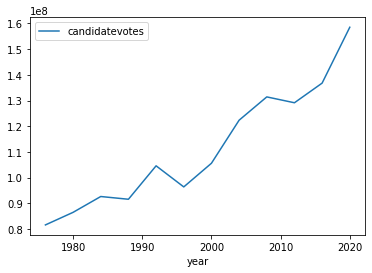

In [95]:
# cantidad de votos por cada eleccion
votes = presidents[['year', 'candidatevotes']].groupby(['year']).sum()
display(votes)
votes.plot()

## % de votos obtenidos por cada ganador

In [96]:
# % de votos obtenidos por cada ganador
ganadores = pd.read_html('https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States')
ganadores = ganadores[1]
ganadores = ganadores[['Name(Birth–Death)', 'Election', 'Vice President']]
# rename the Name(Birth–Death) column
ganadores.rename(columns={'Name(Birth–Death)': 'name_birth', 'Election': 'election', 'Vice President': 'vicepresident'}, inplace=True)
# drop the last row
ganadores = ganadores.drop(ganadores.index[-1])

In [97]:
# convertir los datos de ganador (nacimiento-muerte) en 2 columnas
columnas_nombre = ganadores['name_birth'].str.rsplit('(', expand=True).rename(columns={0: 'name', 1: 'birth'})

# el nombre lo necesitamos en mayusculas y en la forma APELLIDO, NOMBRE
columnas_nombre['name'] = columnas_nombre['name'].str.upper()

ganadores = ganadores.join(columnas_nombre['name'].str.rsplit(' ', n=1, expand=True).rename(columns={0: 'firstname', 1: 'lastname'}))


In [98]:
ganadores['winner'] = ganadores['lastname'] + ', ' + ganadores['firstname']
ganadores

,name_birth,election,vicepresident,firstname,lastname,winner
0,George Washington(1732–1799),1788–89,John Adams[c],GEORGE,WASHINGTON,"WASHINGTON, GEORGE"
1,George Washington(1732–1799),1792,John Adams[c],GEORGE,WASHINGTON,"WASHINGTON, GEORGE"
2,John Adams(1735–1826),1796,Thomas Jefferson[d],JOHN,ADAMS,"ADAMS, JOHN"
3,Thomas Jefferson(1743–1826),1800,Aaron Burr,THOMAS,JEFFERSON,"JEFFERSON, THOMAS"
4,Thomas Jefferson(1743–1826),1804,George Clinton[e],THOMAS,JEFFERSON,"JEFFERSON, THOMAS"
...,...,...,...,...,...,...
77,George W. Bush(b. 1946),2004,Dick Cheney,GEORGE W.,BUSH,"BUSH, GEORGE W."
78,Barack Obama(b. 1961),2008,Joe Biden,BARACK,OBAMA,"OBAMA, BARACK"
79,Barack Obama(b. 1961),2012,Joe Biden,BARACK,OBAMA,"OBAMA, BARACK"
80,Donald Trump(b. 1946),2016,Mike Pence,DONALD,TRUMP,"TRUMP, DONALD"


In [100]:
# convertir election en numerico
ganadores['election'] = ganadores['election'].str.replace('–.*$', '', regex=True).astype(int)

In [101]:
ganadores

,name_birth,election,vicepresident,firstname,lastname,winner
0,George Washington(1732–1799),1788,John Adams[c],GEORGE,WASHINGTON,"WASHINGTON, GEORGE"
1,George Washington(1732–1799),1792,John Adams[c],GEORGE,WASHINGTON,"WASHINGTON, GEORGE"
2,John Adams(1735–1826),1796,Thomas Jefferson[d],JOHN,ADAMS,"ADAMS, JOHN"
3,Thomas Jefferson(1743–1826),1800,Aaron Burr,THOMAS,JEFFERSON,"JEFFERSON, THOMAS"
4,Thomas Jefferson(1743–1826),1804,George Clinton[e],THOMAS,JEFFERSON,"JEFFERSON, THOMAS"
...,...,...,...,...,...,...
77,George W. Bush(b. 1946),2004,Dick Cheney,GEORGE W.,BUSH,"BUSH, GEORGE W."
78,Barack Obama(b. 1961),2008,Joe Biden,BARACK,OBAMA,"OBAMA, BARACK"
79,Barack Obama(b. 1961),2012,Joe Biden,BARACK,OBAMA,"OBAMA, BARACK"
80,Donald Trump(b. 1946),2016,Mike Pence,DONALD,TRUMP,"TRUMP, DONALD"


In [103]:
presidents = presidents.merge(ganadores[['election', 'vicepresident', 'winner']], left_on='year', right_on='election', how='left')

In [106]:
presidents['won'] = presidents['candidate'] == presidents['winner']

In [111]:
presidents[presidents['won']]

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,election,vicepresident,winner,won
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1976,Walter Mondale,"CARTER, JIMMY",True
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,1976,Walter Mondale,"CARTER, JIMMY",True
12,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,295602,742719,20210113,NaN,DEMOCRAT,1976,Walter Mondale,"CARTER, JIMMY",True
19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1976,Walter Mondale,"CARTER, JIMMY",True
24,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,3742284,7803770,20210113,NaN,DEMOCRAT,1976,Walter Mondale,"CARTER, JIMMY",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,2004,VIRGINIA,VA,51,54,40,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,1716959,3195415,20210113,NaN,REPUBLICAN,2004,Dick Cheney,"BUSH, GEORGE W.",True
2703,2004,WASHINGTON,WA,53,91,73,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,1304894,2859084,20210113,NaN,REPUBLICAN,2004,Dick Cheney,"BUSH, GEORGE W.",True
2711,2004,WEST VIRGINIA,WV,54,55,56,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,423778,755792,20210113,NaN,REPUBLICAN,2004,Dick Cheney,"BUSH, GEORGE W.",True
2717,2004,WISCONSIN,WI,55,35,25,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,1478120,2997007,20210113,NaN,REPUBLICAN,2004,Dick Cheney,"BUSH, GEORGE W.",True


In [116]:
percent = presidents[presidents['won']][['year', 'candidate', 'candidatevotes', 'totalvotes']].groupby(['year', 'candidate']).sum()
percent['percent'] = percent['candidatevotes'] / percent['totalvotes']
percent

,,candidatevotes,totalvotes,percent
year,candidate,,,
1976,"CARTER, JIMMY",40825839,88269606,0.462513
1980,"REAGAN, RONALD",43898770,92698810,0.473563
1984,"REAGAN, RONALD",54455073,99461671,0.547498
1992,"CLINTON, BILL",44954303,111679212,0.402531
1996,"CLINTON, BILL",47401898,102828947,0.460978
2000,"BUSH, GEORGE W.",50456169,112554197,0.448283
2004,"BUSH, GEORGE W.",62028285,129797716,0.477884
